In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [6]:
df = pd.read_csv("../data/interim/SPY_clean_data.csv")
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return
1,2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600,-0.000164,-0.000164
2,2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200,-0.002898,-0.002902
3,2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200,0.006142,0.006123
4,2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300,0.000218,0.000218
5,2014-01-09,149.572510,183.639999,184.130005,182.800003,184.110001,90683400,0.000654,0.000654


In [8]:
r = df["log_return"]
r

1      -0.000164
2      -0.002902
3       0.006123
4       0.000218
5       0.000654
          ...   
3038    0.004959
3039   -0.008491
3040   -0.004856
3041   -0.012568
3042    0.019003
Name: log_return, Length: 3042, dtype: float64

# Fit Normal Distribution

In [9]:
mu_norm = r.mean()
sigma_norm = r.std()

print("Normal Distribution Parameters")
print(f"Mean (μ): {mu_norm:.6f}")
print(f"Std  (σ): {sigma_norm:.6f}")

Normal Distribution Parameters
Mean (μ): 0.000504
Std  (σ): 0.010921


# Plot Normal Fit

In [11]:
ticker = "SPY"

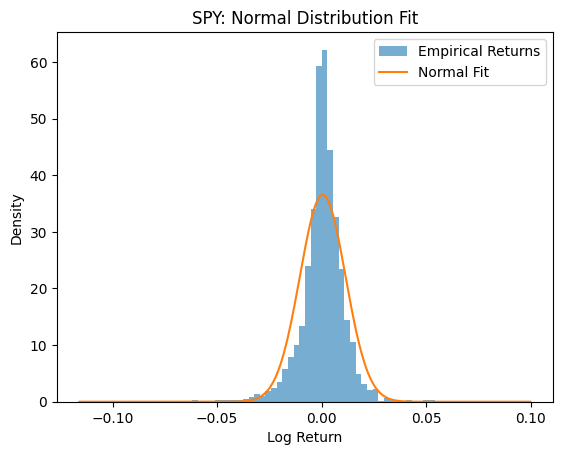

In [12]:
x = np.linspace(r.min(), r.max(), 1000)

plt.hist(r, bins=80, density=True, alpha=0.6, label="Empirical Returns")
plt.plot(x, stats.norm.pdf(x, mu_norm, sigma_norm), label="Normal Fit")
plt.title(f"{ticker}: Normal Distribution Fit")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.legend()
plt.show()

# Fit Student-t Distribution

In [13]:
nu_t, mu_t, sigma_t = stats.t.fit(r)

print("Student-t Distribution Parameters")
print(f"Degrees of Freedom (ν): {nu_t:.2f}")
print(f"Location (μ): {mu_t:.6f}")
print(f"Scale (σ): {sigma_t:.6f}")

Student-t Distribution Parameters
Degrees of Freedom (ν): 2.68
Location (μ): 0.000943
Scale (σ): 0.006222


# Plot Student-t Fit

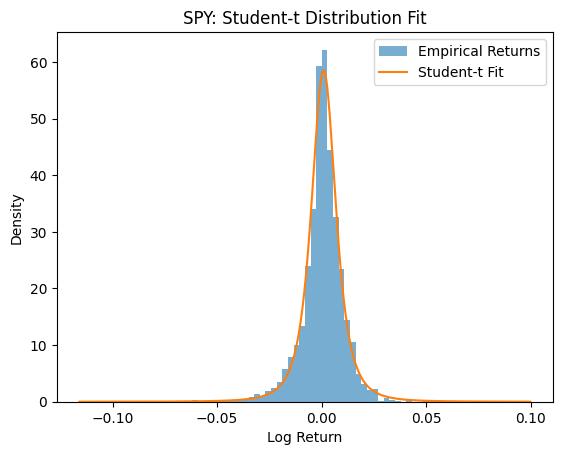

In [14]:
plt.hist(r, bins=80, density=True, alpha=0.6, label="Empirical Returns")
plt.plot(x, stats.t.pdf(x, nu_t, mu_t, sigma_t), label="Student-t Fit")
plt.title(f"{ticker}: Student-t Distribution Fit")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.legend()
plt.show()

# Fit Skew-Normal Distribution

In [15]:
alpha_skew, mu_skew, sigma_skew = stats.skewnorm.fit(r)

print("Skew-Normal Distribution Parameters")
print(f"Skewness (α): {alpha_skew:.2f}")
print(f"Location (μ): {mu_skew:.6f}")
print(f"Scale (σ): {sigma_skew:.6f}")

Skew-Normal Distribution Parameters
Skewness (α): -1.10
Location (μ): 0.008291
Scale (σ): 0.013411


# Plot Skew-Normal Fit

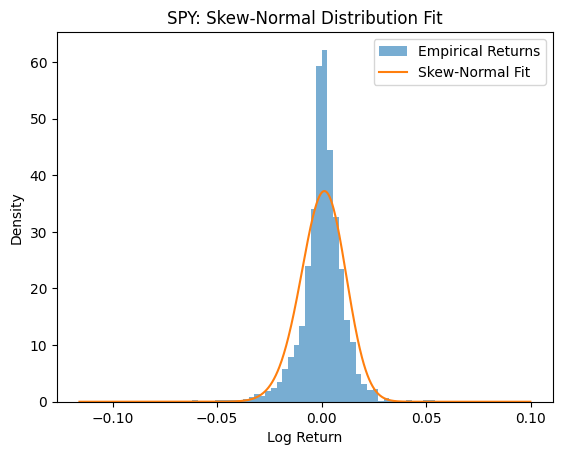

In [16]:
plt.hist(r, bins=80, density=True, alpha=0.6, label="Empirical Returns")
plt.plot(x, stats.skewnorm.pdf(x, alpha_skew, mu_skew, sigma_skew),
         label="Skew-Normal Fit")
plt.title(f"{ticker}: Skew-Normal Distribution Fit")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.legend()
plt.show()